<a href="https://colab.research.google.com/github/antonychackotc/personal-project-1/blob/main/hospital_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hospital Beds Data India**

In [114]:
import pandas as pd

In [115]:
import warnings
warnings.filterwarnings('ignore')

# **1) Exploratory Data Analysis (EDA)**

# **Reading Dataset**

**Analyzing the Data**

In [116]:
df=pd.read_csv('/content/hospital_beds_per_india_v1.csv')
df.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url
0,IN,AN,NaN,11.7401,92.6586,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
1,IN,AP,NaN,15.9129,79.7400,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
2,IN,AR,NaN,28.2180,94.7278,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
3,IN,AS,NaN,26.2006,92.9376,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147
4,IN,BR,NaN,25.0961,85.3131,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147


In [117]:
df.shape

(37, 12)

In [118]:
df.columns.values

array(['country', 'state', 'county', 'lat', 'lng', 'type', 'measure',
       'beds', 'population', 'year', 'source', 'source_url'], dtype=object)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     37 non-null     object 
 1   state       37 non-null     object 
 2   county      0 non-null      float64
 3   lat         37 non-null     float64
 4   lng         37 non-null     float64
 5   type        37 non-null     object 
 6   measure     37 non-null     object 
 7   beds        37 non-null     float64
 8   population  37 non-null     int64  
 9   year        37 non-null     int64  
 10  source      37 non-null     object 
 11  source_url  37 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 3.6+ KB


# **Check for Duplication**

In [120]:
df.nunique()

,0
country,1
state,37
county,0
lat,37
lng,33
type,1
measure,1
beds,37
population,37
year,5


df.shape finds there are 37 rows and 12 columns -

**find unique value df.nunique()**

country	1 - > only 1 country for 37 rows..,

state 37 -> there are 37 different values for each rows..,

latitute 37 - there are 37 different values for each rows..,

longitude 33 - there are 33 different values and 4 values are repeted..,

types & measure 1 - only 1 value for 37 rows..,

beds and population 37 - there are unique values for each

year 5 - there are 5 values repeated for each rows

In [121]:
##############################################################################################################

# **Missing Values Calculation**

In [122]:
df.isnull().sum()

,0
country,0
state,0
county,37
lat,0
lng,0
type,0
measure,0
beds,0
population,0
year,0


# **Data Reduction**

# **source column has no use to predit so drop it**

In [123]:
df.drop('source',axis=1,inplace=True)

***county have 100% column was empty - more than 70% column was empty means drop that column as per client advise ***

In [124]:
df.drop('county',axis=1,inplace=True)

In [125]:
df.isnull().sum()

,0
country,0
state,0
lat,0
lng,0
type,0
measure,0
beds,0
population,0
year,0
source_url,0


In [126]:
pip install geopy


In [127]:
import sqlite3
import pandas as pd

# File name of the uploaded CSV
csv_filename = "/content/hospital_beds_per_india_v1.csv"  # Replace this with the uploaded file name

# Load CSV into a pandas DataFrame
df = pd.read_csv(csv_filename)

# Connect to SQLite database (or create a new one)
conn = sqlite3.connect("example.db")
cursor = conn.cursor()

# Write DataFrame to SQLite table
table_name = "hospitaldata"  # Specify your table name
df.to_sql(table_name, conn, if_exists="replace", index=False)

print(f"Table '{table_name}' created in SQLite database.")


Table 'hospitaldata' created in SQLite database.


In [128]:
import sqlite3
import pandas as pd
from geopy.geocoders import Nominatim

# Function to find area using latitude and longitude
def find_area(lat, lon):
    try:
        # Initialize the geolocator
        geolocator = Nominatim(user_agent="geo_locator")

        # Perform reverse geocoding
        location = geolocator.reverse((lat, lon), exactly_one=True)

        # Extract address
        if location:
            return location.address
        else:
            return "Area not found for the given coordinates."
    except Exception as e:
        return f"An error occurred: {e}"

# Connect to the SQLite database
conn = sqlite3.connect('example.db')  # Replace with your database path
cursor = conn.cursor()

# Table name
table_name = "hospitaldata"  # Replace with your table name

# Add a new column 'area' to store the location data if it doesn't already exist
try:
    cursor.execute(f"ALTER TABLE {table_name} ADD COLUMN area TEXT")
except sqlite3.OperationalError:
    print("Column 'area' already exists or cannot be added.")

# Fetch latitude and longitude from the table
cursor.execute(f"SELECT rowid, lat, lng FROM {table_name}")
rows = cursor.fetchall()

# List to store DataFrame rows
data = []

# Process each row and update the 'area' column
for row in rows:
    rowid, lat, lng = row
    area = find_area(lat, lng)
    print(f"Coordinates: ({lat}, {lng}) -> Location: {area}")

    # Update the table with the retrieved area
    cursor.execute(f"UPDATE {table_name} SET area = ? WHERE rowid = ?", (area, rowid))
    conn.commit()

    # Append data to the list
    data.append({"Latitude": lat, "Longitude": lng, "Area": area})

# Close the database connection
conn.close()

# Create a DataFrame
df1 = pd.DataFrame(data)

# Print the DataFrame
print(df1)

# Optionally save the DataFrame to a CSV file
df1.to_csv("hospitaldata_with_areas.csv", index=False)


Coordinates: (11.7401, 92.6586) -> Location: Andaman Trunk Road, Jirkatang Camp No. 7, Ferrargunj, South Andaman, Andaman and Nicobar Islands, India
Coordinates: (15.9129, 79.74) -> Location: Vinukonda - Mupparajuvaripalem Road, Lakshmipuram, Nuzendla, Palnadu, Andhra Pradesh, 522660, India
Coordinates: (28.218, 94.7278) -> Location: Kamba, Kamba ADC, Siang, Arunachal Pradesh, India
Coordinates: (26.2006, 92.9376) -> Location: Doboka, Hojai, Assam, India
Coordinates: (25.0961, 85.3131) -> Location: Shobha infotech, Shivaganj, Islampur, Nalanda, Bihar, 813202, India
Coordinates: (30.7333, 76.7794) -> Location: Junction 27, Sector 22, Ward 3, Chandigarh, 160018, India
Coordinates: (21.2787, 81.8661) -> Location: Arang Tahsil, Raipur, Chhattisgarh, India
Coordinates: (20.1809, 73.0169) -> Location: Khadoli, Nagar Haveli, Dadra and Nagar Haveli, Dadra and Nagar Haveli and Daman and Diu, India
Coordinates: (20.4283, 72.8397) -> Location: Daman Airport, Daman to NH8, Daman, Dadra and Nagar H

In [129]:
df1=pd.read_csv('/content/hospitaldata_with_areas.csv')
df1.head()

,Latitude,Longitude,Area
0,11.7401,92.6586,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr..."
1,15.9129,79.7400,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu..."
2,28.2180,94.7278,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India"
3,26.2006,92.9376,"Doboka, Hojai, Assam, India"
4,25.0961,85.3131,"Shobha infotech, Shivaganj, Islampur, Nalanda,..."


In [130]:
# Assuming `df1` is your DataFrame
df1.rename(columns={"Latitude": "lat", "Longitude": "lng"}, inplace=True)

df1


,lat,lng,Area
0,11.740100,92.658600,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr..."
1,15.912900,79.740000,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu..."
2,28.218000,94.727800,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India"
3,26.200600,92.937600,"Doboka, Hojai, Assam, India"
4,25.096100,85.313100,"Shobha infotech, Shivaganj, Islampur, Nalanda,..."
5,30.733300,76.779400,"Junction 27, Sector 22, Ward 3, Chandigarh, 16..."
6,21.278700,81.866100,"Arang Tahsil, Raipur, Chhattisgarh, India"
7,20.180900,73.016900,"Khadoli, Nagar Haveli, Dadra and Nagar Haveli,..."
8,20.428300,72.839700,"Daman Airport, Daman to NH8, Daman, Dadra and ..."
9,28.704100,77.102500,"Sector 3, Rohini, Rohini Tehsil, North West De..."


In [131]:
df1.to_csv('correctdata-area.csv')

In [132]:
df1=pd.read_csv('/content/correctdata-area.csv')

In [133]:
df1.head()

,Unnamed: 0,lat,lng,Area
0,0,11.7401,92.6586,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr..."
1,1,15.9129,79.7400,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu..."
2,2,28.2180,94.7278,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India"
3,3,26.2006,92.9376,"Doboka, Hojai, Assam, India"
4,4,25.0961,85.3131,"Shobha infotech, Shivaganj, Islampur, Nalanda,..."


In [134]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [135]:
df1.head()

,lat,lng,Area
0,11.7401,92.6586,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr..."
1,15.9129,79.7400,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu..."
2,28.2180,94.7278,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India"
3,26.2006,92.9376,"Doboka, Hojai, Assam, India"
4,25.0961,85.3131,"Shobha infotech, Shivaganj, Islampur, Nalanda,..."


In [136]:
# merge df and df1 using lat and lng

In [137]:
df2=pd.merge(df,df1,on=['lat','lng'])

In [138]:
df2.head()

,country,state,county,lat,lng,type,measure,beds,population,year,source,source_url,Area
0,IN,AN,NaN,11.7401,92.6586,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr..."
1,IN,AP,NaN,15.9129,79.7400,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu..."
2,IN,AR,NaN,28.2180,94.7278,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India"
3,IN,AS,NaN,26.2006,92.9376,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Doboka, Hojai, Assam, India"
4,IN,BR,NaN,25.0961,85.3131,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Shobha infotech, Shivaganj, Islampur, Nalanda,..."


In [139]:
df2.drop('county',axis=1,inplace=True)

In [140]:
df2.isnull().sum()

,0
country,0
state,0
lat,0
lng,0
type,0
measure,0
beds,0
population,0
year,0
source,0


In [141]:
df2.to_csv('finaldata.csv')

In [142]:
df3=pd.read_csv('/content/finaldata.csv')

In [143]:
df3.head()

,Unnamed: 0,country,state,lat,lng,type,measure,beds,population,year,source,source_url,Area
0,0,IN,AN,11.7401,92.6586,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr..."
1,1,IN,AP,15.9129,79.7400,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu..."
2,2,IN,AR,28.2180,94.7278,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India"
3,3,IN,AS,26.2006,92.9376,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Doboka, Hojai, Assam, India"
4,4,IN,BR,25.0961,85.3131,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Shobha infotech, Shivaganj, Islampur, Nalanda,..."


In [144]:
df3.drop('Unnamed: 0',axis=1,inplace=True)

In [145]:
df3['year'].value_counts()

,count
year,
2018,13
2017,11
2015,7
2016,5
2014,1


**2018 have 13 rows**

**2017 have 11 rows**

**2015 have 7 rows**

**2016 have 5 rows**

**2014 have 1 row**

In [146]:
print(df3.year.unique())
print(df3.year.nunique())

[2016 2017 2018 2015 2014]
5


**Change rows values eg: caps to small or change rows values etc**

In [147]:
df3["country"].replace({"IN": "India"}, inplace=True)

In [148]:
df3.head()

,country,state,lat,lng,type,measure,beds,population,year,source,source_url,Area
0,India,AN,11.7401,92.6586,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr..."
1,India,AP,15.9129,79.7400,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu..."
2,India,AR,28.2180,94.7278,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India"
3,India,AS,26.2006,92.9376,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Doboka, Hojai, Assam, India"
4,India,BR,25.0961,85.3131,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Shobha infotech, Shivaganj, Islampur, Nalanda,..."


# **Our Data is ready to perform EDA**

# **Categorical Columns and numerical columns**

In [149]:
import numpy as np # Import the numpy library with the alias 'np'

cat_cols=df3.select_dtypes(include=['object']).columns
num_cols = df3.select_dtypes(include=np.number).columns.tolist() # Now np is defined and can be used
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['country', 'state', 'type', 'measure', 'source', 'source_url', 'Area'], dtype='object')
Numerical Variables:
['lat', 'lng', 'beds', 'population', 'year']


In [150]:
# important colums for analysing:-

# for category -> state,area   #country column not important because of only one country in data
# for numerical -> beds,population,year


# **2)Statistics Summary**

In [151]:
df3.describe()

,lat,lng,beds,population,year
count,37.000000,37.000000,37.000000,3.700000e+01,37.000000
mean,22.500439,81.595037,27.304251,7.063516e+07,2016.756757
std,6.490228,7.347561,159.577108,2.216202e+08,1.211184
min,8.295441,71.192400,0.094838,7.978800e+04,2014.000000
25%,19.751500,76.085600,0.436072,1.510000e+06,2016.000000
50%,23.164500,79.019300,0.815190,2.630000e+07,2017.000000
75%,27.023800,87.855000,1.427893,5.306000e+07,2018.000000
max,33.778200,94.727800,971.725071,1.353000e+09,2018.000000


**mean value of 5 years is 2016**

**minimum value is 2014**

**25% quartile - 2016**

**50% quartitle - 2017**

**75% quartile - 2018**

**max value is 2018**

In [152]:
df3.describe(include='all')

,country,state,lat,lng,type,measure,beds,population,year,source,source_url,Area
count,37,37,37.000000,37.000000,37,37,37.000000,3.700000e+01,37.000000,37,37,37
unique,1,37,NaN,NaN,1,1,NaN,NaN,NaN,1,1,37
top,India,AN,NaN,NaN,TOTAL,1000HAB,NaN,NaN,NaN,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr..."
freq,37,1,NaN,NaN,37,37,NaN,NaN,NaN,37,37,1
mean,NaN,NaN,22.500439,81.595037,NaN,NaN,27.304251,7.063516e+07,2016.756757,NaN,NaN,NaN
std,NaN,NaN,6.490228,7.347561,NaN,NaN,159.577108,2.216202e+08,1.211184,NaN,NaN,NaN
min,NaN,NaN,8.295441,71.192400,NaN,NaN,0.094838,7.978800e+04,2014.000000,NaN,NaN,NaN
25%,NaN,NaN,19.751500,76.085600,NaN,NaN,0.436072,1.510000e+06,2016.000000,NaN,NaN,NaN
50%,NaN,NaN,23.164500,79.019300,NaN,NaN,0.815190,2.630000e+07,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,27.023800,87.855000,NaN,NaN,1.427893,5.306000e+07,2018.000000,NaN,NaN,NaN


#3) **check algorithm its Continous or disgrit**

In [153]:
import seaborn as sns

<Axes: xlabel='population', ylabel='year'>

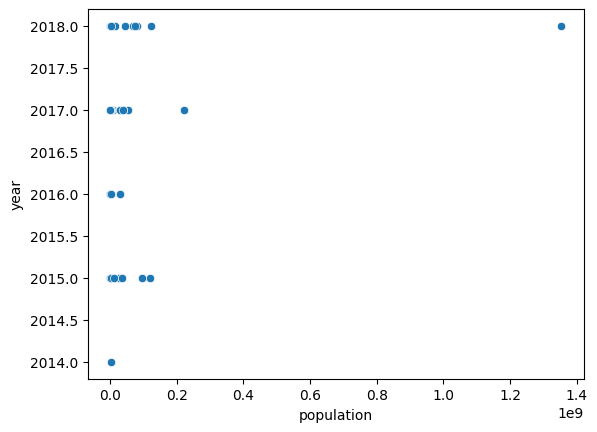

In [154]:
sns.scatterplot(data=df3,x='population',y='year')

<Axes: xlabel='population', ylabel='beds'>

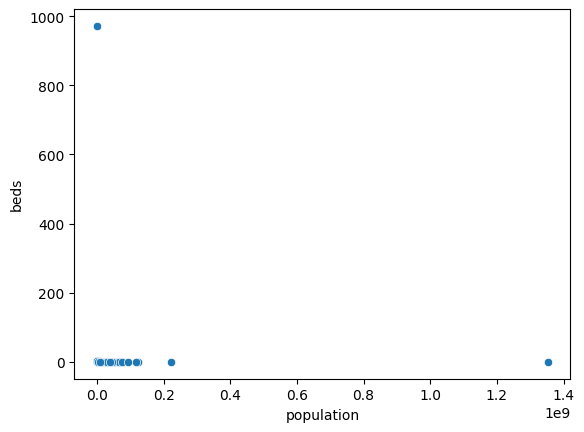

In [155]:
sns.scatterplot(data=df3,x='population',y='beds')

**when machine learning topics using decession tree algorithm because of its disgret in nature**

# **4) Data Preprocessing / data engineering**

# **check outliers**

<Axes: xlabel='population'>

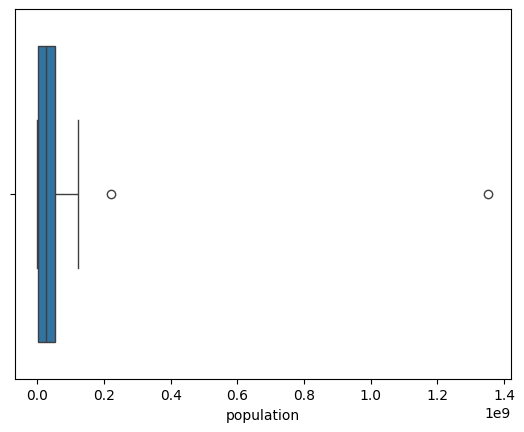

In [156]:
sns.boxplot(data=df3,x='population')

<Axes: xlabel='beds'>

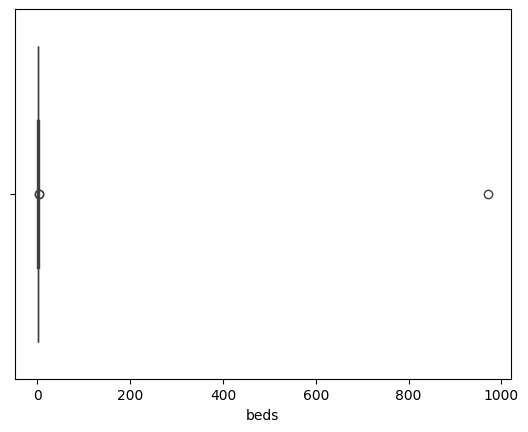

In [157]:
sns.boxplot(data=df3,x='beds')

<Axes: xlabel='year'>

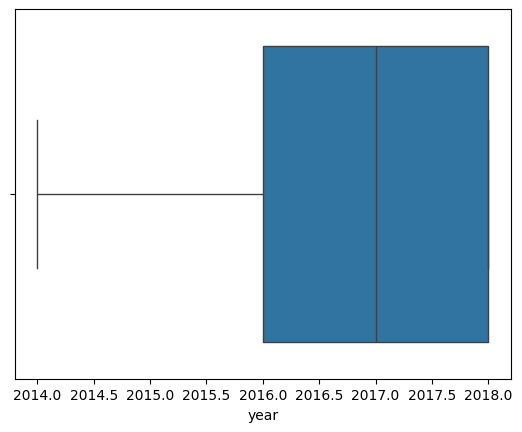

In [158]:
sns.boxplot(data=df3,x='year')

**in boxplot check outliers**

**in population and beds have 2 outliers**

**year column have no outliers**

In [159]:
# using iqr method

In [160]:
def detect_outlier_iqr(df3):
  outliers=[]
  data=sorted(df3)
  q1=np.percentile(data,25)
  q3=np.percentile(data,75)
  iqr=q3-q1
  lwr_bound=q1-(1.5*iqr)
  upr_bound=q3+(1.5*iqr)

  for i in data:
    if(i<lwr_bound or i>upr_bound):
      outliers.append(i)
  return outliers
sample_outliers=detect_outlier_iqr(df3['population'])
print("Outlier for Population : ",sample_outliers)

Outlier for Population :  [221073168, 1353000000]


***outlier value for 1353000000 is not for state population value its overall india population on 2017 so this row is no need, delete that particular row ***

In [161]:
# Identify the rows to drop
rows_to_drop = df3[df3['state'] == 'IN'].index

# Drop those rows
df3.drop(rows_to_drop, axis=0, inplace=True)


In [162]:
def detect_outlier_iqr(df3):
  outliers=[]
  data=sorted(df3)
  q1=np.percentile(data,25)
  q3=np.percentile(data,75)
  iqr=q3-q1
  lwr_bound=q1-(1.5*iqr)
  upr_bound=q3+(1.5*iqr)

  for i in data:
    if(i<lwr_bound or i>upr_bound):
      outliers.append(i)
  return outliers
sample_outliers=detect_outlier_iqr(df3['beds'])
print("Outlier for beds : ",sample_outliers)

Outlier for beds :  [3.305227, 3.614458, 971.725071]


2.1653187422611477

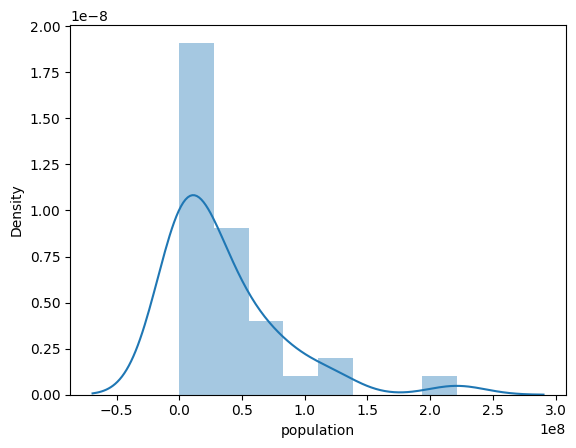

In [163]:
sns.distplot(df3['population'])
df3['population'].skew()

**Skew is between -0.5 to 0.5 is only normal distribution**

**skew 2.1653187422611477 is posative distribution or right tail is highly skewed not a normal**

5.999710160246187

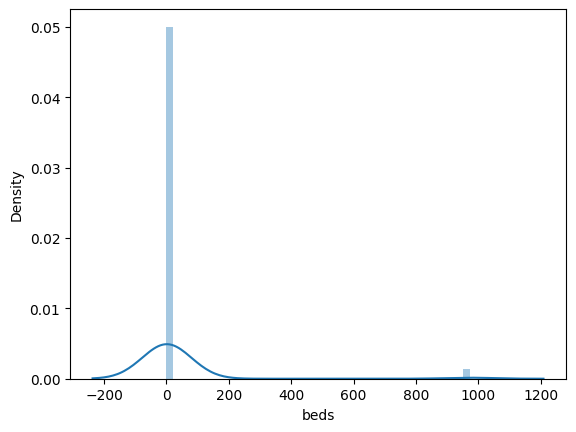

In [164]:
sns.distplot(df3['beds'])
df3['beds'].skew()

**beds also highly skewed posative distribution right tail**

-0.5560711568599974

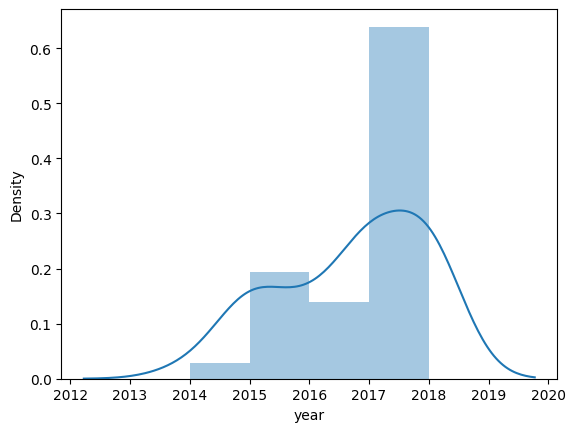

In [165]:
sns.distplot(df3['year'])
df3['year'].skew()

**-0.5938221504007254 is almost a normal distribution left tail little bit increase value betweeb -0.5 to 0.5 only skewed but year column is almost skewes**

In [166]:
# Treatment of outliers

**Treatment and Removal of outliers**

using **capping** method as per client permission

**1)forward fill - ffill**

**2)backward fill - bfill**

***3)maximum or minimum ***

**4) mode imputation**

**5) mean imputation**

**6) median imputation**

**7) standard deviation**

**8) moving average imputation**

# **SQL**

In [167]:
import pandas as pd
import sqlite3

# Reconnect to the database
conn = sqlite3.connect("example.db") # Re-establish connection here

# Step 1: Run your SQL query to fetch the data
query = f"SELECT state, year, population, beds FROM {table_name} order by beds desc;"
result = pd.read_sql_query(query, conn)

# Step 2: Ensure no division by zero (replace 0 beds with NaN or handle it)
result['beds'] = result['beds'].replace(0, None)

# Step 3: Calculate the 'population per bed' for each state
result['population_per_bed'] = result['population'] / result['beds']

# Step 4: Calculate the percentage of total beds
total_beds = result['beds'].sum()
result['bed_percentage'] = (result['beds'] / total_beds) * 100

# Display the updated result
print(result)

# Close the connection when you're completely done with it
conn.close()

   state  year  population        beds  population_per_bed  bed_percentage
0     TN  2017       79788  971.725071        8.210964e+01       96.185900
1     LD  2016       83000    3.614458        2.296333e+04        0.357776
2     CH  2018     1136382    3.305227        3.438136e+05        0.327167
3     AN  2016      380520    2.825081        1.346935e+05        0.279640
4     PY  2016     1370000    2.605109        5.258897e+05        0.257866
5     SK  2017      642664    2.427396        2.647545e+05        0.240275
6     GA  2018     1508556    1.996611        7.555583e+05        0.197634
7     HP  2017     7297034    1.699184        4.294434e+06        0.168193
8     DN  2018      412174    1.501793        2.744546e+05        0.148655
9     AR  2018     1683600    1.427893        1.179080e+06        0.141340
10    MZ  2017     1510000    1.322517        1.141762e+06        0.130909
11    ML  2017     3470000    1.284438        2.701571e+06        0.127140
12    TR  2018     367103

**Tamilnadu firstplace for helthcare** - but one mistake is tamilnadu population count is wrong because of 79788 insted of 3 zeros was missing

**bihar least place for healthcare**

In [168]:
result.describe()

,year,population,beds,population_per_bed,bed_percentage
count,37.000000,3.700000e+01,37.000000,3.700000e+01,37.000000
mean,2016.756757,7.063516e+07,27.304251,1.714748e+08,2.702703
std,1.211184,2.216202e+08,159.577108,4.669601e+08,15.795690
min,2014.000000,7.978800e+04,0.094838,8.210964e+01,0.009388
25%,2016.000000,1.510000e+06,0.436072,1.141762e+06,0.043164
50%,2017.000000,2.630000e+07,0.815190,2.836772e+07,0.080691
75%,2018.000000,5.306000e+07,1.427893,1.142115e+08,0.141340
max,2018.000000,1.353000e+09,971.725071,2.563928e+09,96.185900


In [169]:
import pandas as pd
import sqlite3

# Reconnect to the database
conn = sqlite3.connect("example.db") # Re-establish connection here

# Step 1: Run your SQL query to fetch the data
query = f"SELECT state, year, population, beds FROM {table_name};"
result = pd.read_sql_query(query, conn)

# Step 2: Ensure no division by zero (replace 0 beds with NaN or handle it)
result['beds'] = result['beds'].replace(0, None)

# Step 3: Calculate the 'population per bed' for each state
result['population_per_bed'] = result['population'] / result['beds']

# Step 4: Calculate the percentage of total beds
total_beds = result['beds'].sum()
result['bed_percentage'] = (result['beds'] / total_beds) * 100

# Update the SQLite table with the new 'bed_percentage' column
result.to_sql(table_name, conn, if_exists="replace", index=False)  # Update the table

query = f"SELECT state,year,population,beds,bed_percentage FROM {table_name} WHERE state='TN';"
result = pd.read_sql_query(query, conn)

# Display the results
result

# Close the connection when done
conn.close()

result

,state,year,population,beds,bed_percentage
0,TN,2017,79788,971.725071,96.1859


In [212]:
import pandas as pd
import sqlite3

# Reconnect to the database
conn = sqlite3.connect("example.db")  # Re-establish connection here

# Define state/UT code to region mapping
state_to_region = {
    "TN": "South",         # Tamil Nadu
    "KL": "South",         # Kerala
    "KA": "South",         # Karnataka
    "AP": "South",         # Andhra Pradesh
    "CT": "Central",        #Chhattisgarh
    "TS": "South",         # Telangana
    "MH": "West",          # Maharashtra
    "GJ": "West",          # Gujarat
    "GA": "West",          # Goa
    "RJ": "North",         # Rajasthan
    "UP": "North",         # Uttar Pradesh
    "PB": "North",         # Punjab
    "HR": "North",         # Haryana
    "JK": "North",         # Jammu & Kashmir
    "HP": "North",         # Himachal Pradesh
    "DL": "North",         # Delhi
    "UT": "North",         # Uttarakhand
    "WB": "East",          # West Bengal
    "OR": "East",          # Odisha
    "BR": "East",          # Bihar
    "JH": "East",          # Jharkhand
    "AS": "North-East",    # Assam
    "TG": "South",         #Telangana
    "MN": "North-East",    # Manipur
    "NL": "North-East",    # Nagaland
    "MZ": "North-East",    # Mizoram
    "TR": "North-East",    # Tripura
    "SK": "North-East",    # Sikkim
    "AR": "North-East",    # Arunachal Pradesh
    "ML": "North-East",    # Meghalaya
    "MP": "Central",       # Madhya Pradesh
    "CG": "Central",       # Chhattisgarh
    "CH": "North",         # Chandigarh (Union Territory)
    "PY": "South",         # Puducherry (Union Territory)
    "AN": "South",         # Andaman and Nicobar Islands (Union Territory)
    "LD": "South",         # Lakshadweep (Union Territory)
    "DD": "West",          # Daman and Diu (Union Territory)
    "DN": "West",          # Dadra and Nagar Haveli (Union Territory)
    "LA": "North",         # Ladakh (Union Territory)
}

# Step 1: Run your SQL query to fetch the data
query = f"SELECT state, year, population, beds FROM {table_name};"
result = pd.read_sql_query(query, conn)

# Step 2: Ensure no division by zero (replace 0 beds with None or handle it)
result["beds"] = result["beds"].replace(0, None)

# Step 3: Calculate the 'population per bed' for each state
result["population_per_bed"] = result["population"] / result["beds"]

# Step 4: Calculate the percentage of total beds
total_beds = result["beds"].sum()
result["bed_percentage"] = (result["beds"] / total_beds) * 100

# Step 5: Add the region column
result["region"] = result["state"].map(state_to_region)

# Step 6: Update the SQLite table with the new columns
result.to_sql(table_name, conn, if_exists="replace", index=False)  # Update the table

# Query the updated table
query = f"SELECT state, year, population, beds, bed_percentage, region FROM {table_name};"
updated_result = pd.read_sql_query(query, conn)

# Display the results
print(updated_result)

# Close the connection when done
conn.close()


   state  year  population        beds  bed_percentage      region
0     AN  2016      380520    2.825081        0.279640       South
1     AP  2017    53060000    0.436072        0.043164       South
2     AR  2018     1683600    1.427893        0.141340  North-East
3     AS  2017    34438756    0.497753        0.049270  North-East
4     BR  2018   122988691    0.094838        0.009388        East
5     CH  2018     1136382    3.305227        0.327167       North
6     CT  2016    28200000    0.333759        0.033037     Central
7     DN  2018      412174    1.501793        0.148655        West
8     DD  2015      294410    0.815190        0.080691        West
9     DL  2015    26300000    0.927110        0.091770       North
10    GA  2018     1508556    1.996611        0.197634        West
11    GJ  2018    68052000    0.296420        0.029341        West
12    HR  2016    28332000    0.396725        0.039270       North
13    HP  2017     7297034    1.699184        0.168193       N

In [213]:
updated_result.to_csv('region-state.csv')

In [214]:
df4=pd.read_csv('/content/region-state.csv')

In [215]:
df4.head()

,Unnamed: 0,state,year,population,beds,bed_percentage,region
0,0,AN,2016,380520,2.825081,0.279640,South
1,1,AP,2017,53060000,0.436072,0.043164,South
2,2,AR,2018,1683600,1.427893,0.141340,North-East
3,3,AS,2017,34438756,0.497753,0.049270,North-East
4,4,BR,2018,122988691,0.094838,0.009388,East


In [216]:
# Identify the rows to drop
rows_to_drop = df4[df4['state'] == 'IN'].index

# Drop those rows
df4.drop(rows_to_drop, axis=0, inplace=True)


In [232]:
df4

,Unnamed: 0,state,year,population,beds,bed_percentage,region
0,0,AN,2016,380520,2.825081,0.279640,South
1,1,AP,2017,53060000,0.436072,0.043164,South
2,2,AR,2018,1683600,1.427893,0.141340,North-East
3,3,AS,2017,34438756,0.497753,0.049270,North-East
4,4,BR,2018,122988691,0.094838,0.009388,East
5,5,CH,2018,1136382,3.305227,0.327167,North
6,6,CT,2016,28200000,0.333759,0.033037,Central
7,7,DN,2018,412174,1.501793,0.148655,West
8,8,DD,2015,294410,0.815190,0.080691,West
9,9,DL,2015,26300000,0.927110,0.091770,North


**Tamilnadu firstplace for helthcare** - but one mistake is tamilnadu population count is wrong because of 79788 insted of 3 zeros was missing

**bihar least place for healthcare**

In [233]:
# Update the 'population' column where 'state' is 'TN'
df4.loc[df4['state'] == 'TN', 'population'] = 79788000


In [254]:
df4

,Unnamed: 0,state,year,population,beds,bed_percentage,region
0,0,AN,2016,380520,2.825081,0.279640,South
1,1,AP,2017,53060000,0.436072,0.043164,South
2,2,AR,2018,1683600,1.427893,0.141340,North-East
3,3,AS,2017,34438756,0.497753,0.049270,North-East
4,4,BR,2018,122988691,0.094838,0.009388,East
5,5,CH,2018,1136382,3.305227,0.327167,North
6,6,CT,2016,28200000,0.333759,0.033037,Central
7,7,DN,2018,412174,1.501793,0.148655,West
8,8,DD,2015,294410,0.815190,0.080691,West
9,9,DL,2015,26300000,0.927110,0.091770,North


In [255]:
df3.head()

,country,state,lat,lng,type,measure,beds,population,year,source,source_url,Area,beds_per_1000
0,India,AN,11.7401,92.6586,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr...",7.424264e-03
1,India,AP,15.9129,79.7400,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu...",8.218470e-06
2,India,AR,28.2180,94.7278,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India",8.481189e-04
3,India,AS,26.2006,92.9376,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Doboka, Hojai, Assam, India",1.445328e-05
4,India,BR,25.0961,85.3131,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Shobha infotech, Shivaganj, Islampur, Nalanda,...",7.711115e-07


In [256]:
# Update the 'population' column where 'state' is 'TN'
df3.loc[df3['state'] == 'TN', 'population'] = 79788000


In [257]:
df5=pd.merge(df3,df4,on=['state','year','population','beds'])

In [258]:
df5

,country,state,lat,lng,type,measure,beds,population,year,source,source_url,Area,beds_per_1000,Unnamed: 0,bed_percentage,region
0,India,AN,11.740100,92.658600,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr...",7.424264e-03,0,0.279640,South
1,India,AP,15.912900,79.740000,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu...",8.218470e-06,1,0.043164,South
2,India,AR,28.218000,94.727800,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India",8.481189e-04,2,0.141340,North-East
3,India,AS,26.200600,92.937600,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Doboka, Hojai, Assam, India",1.445328e-05,3,0.049270,North-East
4,India,BR,25.096100,85.313100,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Shobha infotech, Shivaganj, Islampur, Nalanda,...",7.711115e-07,4,0.009388,East
5,India,CH,30.733300,76.779400,TOTAL,1000HAB,3.305227,1136382,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Junction 27, Sector 22, Ward 3, Chandigarh, 16...",2.908553e-03,5,0.327167,North
6,India,CT,21.278700,81.866100,TOTAL,1000HAB,0.333759,28200000,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Arang Tahsil, Raipur, Chhattisgarh, India",1.183543e-05,6,0.033037,Central
7,India,DN,20.180900,73.016900,TOTAL,1000HAB,1.501793,412174,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Khadoli, Nagar Haveli, Dadra and Nagar Haveli,...",3.643590e-03,7,0.148655,West
8,India,DD,20.428300,72.839700,TOTAL,1000HAB,0.815190,294410,2015,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Daman Airport, Daman to NH8, Daman, Dadra and ...",2.768894e-03,8,0.080691,West
9,India,DL,28.704100,77.102500,TOTAL,1000HAB,0.927110,26300000,2015,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Sector 3, Rohini, Rohini Tehsil, North West De...",3.525133e-05,9,0.091770,North


In [259]:
df5.drop('Unnamed: 0',axis=1,inplace=True)

In [260]:
df5

,country,state,lat,lng,type,measure,beds,population,year,source,source_url,Area,beds_per_1000,bed_percentage,region
0,India,AN,11.740100,92.658600,TOTAL,1000HAB,2.825081,380520,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Andaman Trunk Road, Jirkatang Camp No. 7, Ferr...",7.424264e-03,0.279640,South
1,India,AP,15.912900,79.740000,TOTAL,1000HAB,0.436072,53060000,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Vinukonda - Mupparajuvaripalem Road, Lakshmipu...",8.218470e-06,0.043164,South
2,India,AR,28.218000,94.727800,TOTAL,1000HAB,1.427893,1683600,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Kamba, Kamba ADC, Siang, Arunachal Pradesh, India",8.481189e-04,0.141340,North-East
3,India,AS,26.200600,92.937600,TOTAL,1000HAB,0.497753,34438756,2017,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Doboka, Hojai, Assam, India",1.445328e-05,0.049270,North-East
4,India,BR,25.096100,85.313100,TOTAL,1000HAB,0.094838,122988691,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Shobha infotech, Shivaganj, Islampur, Nalanda,...",7.711115e-07,0.009388,East
5,India,CH,30.733300,76.779400,TOTAL,1000HAB,3.305227,1136382,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Junction 27, Sector 22, Ward 3, Chandigarh, 16...",2.908553e-03,0.327167,North
6,India,CT,21.278700,81.866100,TOTAL,1000HAB,0.333759,28200000,2016,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Arang Tahsil, Raipur, Chhattisgarh, India",1.183543e-05,0.033037,Central
7,India,DN,20.180900,73.016900,TOTAL,1000HAB,1.501793,412174,2018,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Khadoli, Nagar Haveli, Dadra and Nagar Haveli,...",3.643590e-03,0.148655,West
8,India,DD,20.428300,72.839700,TOTAL,1000HAB,0.815190,294410,2015,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Daman Airport, Daman to NH8, Daman, Dadra and ...",2.768894e-03,0.080691,West
9,India,DL,28.704100,77.102500,TOTAL,1000HAB,0.927110,26300000,2015,nhp,http://www.cbhidghs.nic.in/showfile.php?lid=1147,"Sector 3, Rohini, Rohini Tehsil, North West De...",3.525133e-05,0.091770,North


In [223]:
df5['region'].value_counts()

,count
region,
North,9
South,8
North-East,8
West,5
East,4
Central,2


#5) **Exploratory Data Analysis (EDA) - Univariant, Bivariant, Multivariant**

# **Data Visulaization**

# **i) univarient (violinplot)**

<Axes: ylabel='population'>

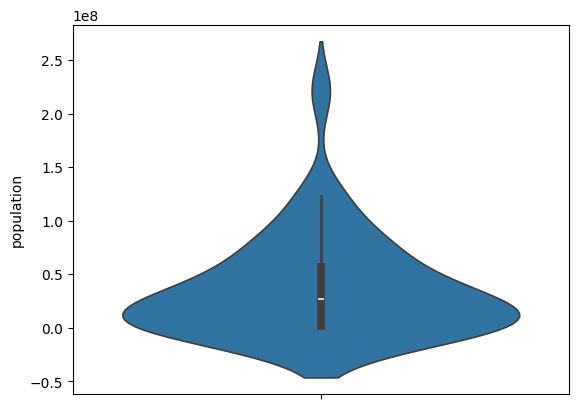

In [262]:
sns.violinplot(df5['population'])

<Axes: ylabel='beds'>

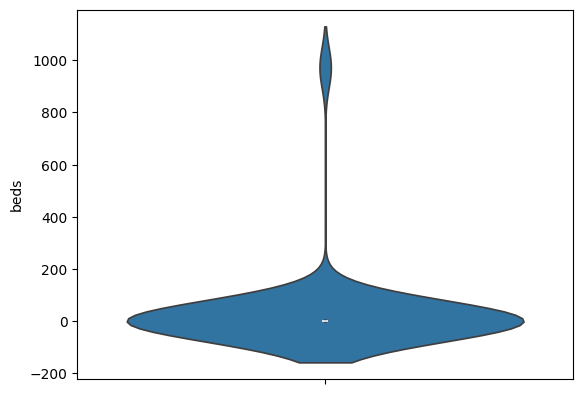

In [263]:
sns.violinplot(df5['beds'])

<Axes: ylabel='year'>

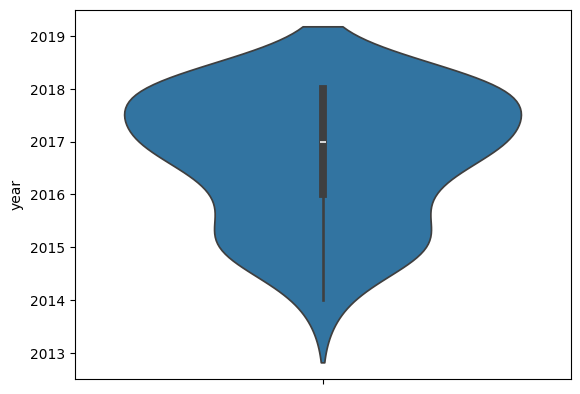

In [264]:
sns.violinplot(df5['year'])

# **countplot of univarient**

In [183]:
import matplotlib.pyplot as plt # Import the pyplot module

year
2018    33.333333
2017    30.555556
2015    19.444444
2016    13.888889
2014     2.777778
Name: count, dtype: float64


<Axes: ylabel='year'>

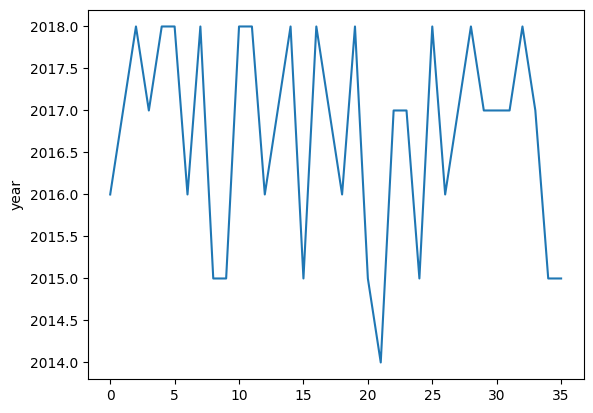

In [265]:

print(df5['year'].value_counts()/len(df3)*100)
sns.lineplot(df5['year'])


year
2018    33.333333
2017    30.555556
2015    19.444444
2016    13.888889
2014     2.777778
Name: count, dtype: float64


<Axes: xlabel='year', ylabel='Count'>

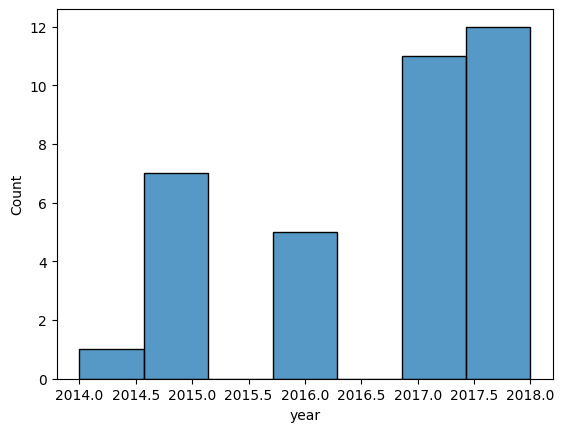

In [266]:

print(df5['year'].value_counts()/len(df3)*100)
sns.histplot(df5['year'])


#2) **Multi-variant**

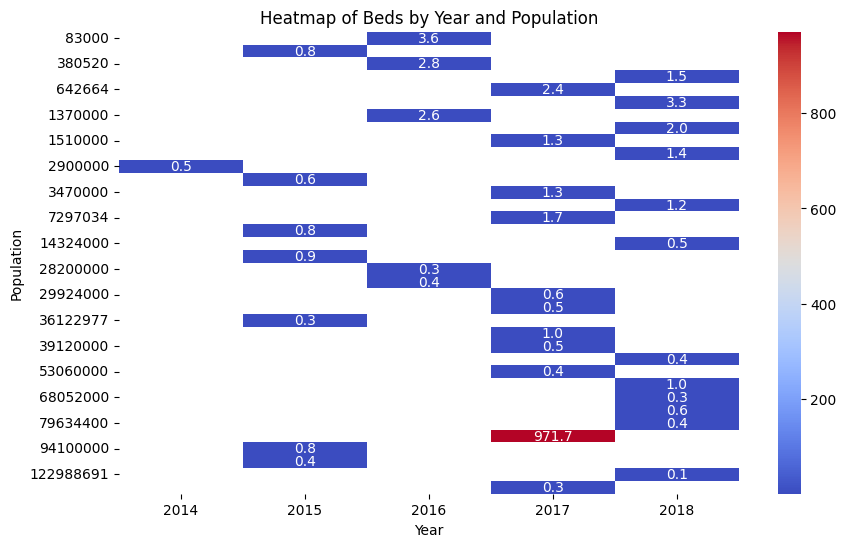

In [267]:

heatmap_data = df5.pivot(index='population', columns='year', values='beds')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar=True)

# Customize the plot
plt.title("Heatmap of Beds by Year and Population")
plt.xlabel("Year")
plt.ylabel("Population")
plt.show()


**The heatmap shows the number of beds per year and population. The color intensity represents the number of beds, with darker colors indicating more beds**

**The number of beds generally increases over the years, with some fluctuations**

**The heatmap suggests that the number of beds is not directly proportional to the population.**

**Some areas with smaller populations have a higher number of beds per capita compared to larger populations.**

**analysing this heatmap -: one of this population is 79788000 provide highest values of bed 971 highest value**

**but highest population provide only 0.5 values of bed**

**least value is 122988691 is provide only 0.1 value of bed**

In [187]:
# heatmap now compare statewise insted of population to analyse deeply

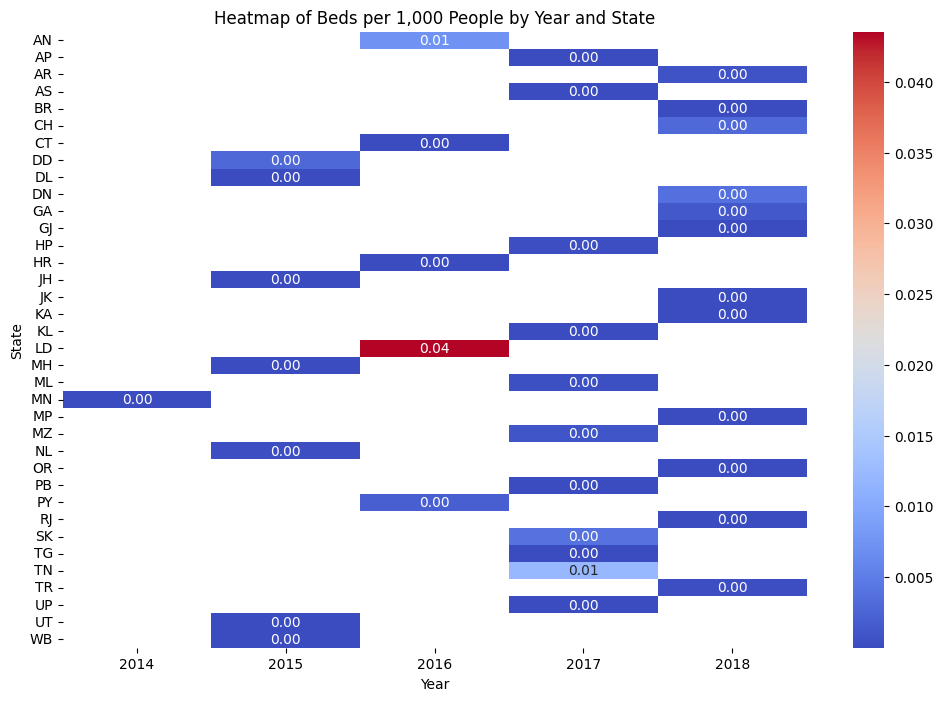

In [268]:
# Calculate beds per 1,000 people
df5['beds_per_1000'] = (df5['beds'] / df5['population']) * 1000

# Pivot the data to create a heatmap-compatible format
heatmap_data = df5.pivot(index='state', columns='year', values='beds_per_1000')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Customize the plot
plt.title("Heatmap of Beds per 1,000 People by Year and State")
plt.xlabel("Year")
plt.ylabel("State")
plt.show()


**The heatmap shows the number of beds per 1,000 people by year and state. The color intensity represents the number of beds, with darker colors indicating more beds**

**1st place was LD - Ladhak Provide 0.04 value of beds per 1000 people**
**2nd place was TN and AN - Tamil Nadu and Andhaman Nicobar has 0.01 value of beds per 1000 people**

**compare to 2 union teritory 1st place taken state was Tamil Nadu**

In [269]:
# 1st place was LD - Ladhak Provide 0.04 value of beds per 1000 people
# 2nd place was TN and AN - Tamil Nadu and Andhaman Nicobar has 0.01 value of beds per 1000 people

# compare to 2 union teritory 1st place taken state was Tamil Nadu

# **Overall Trend:**

**The number of beds generally increases over the years, with some fluctuations.**
**The increase is more pronounced in the later years, especially from 2016 to 2018.**

# **State-wise Variations:**

**There are significant variations in the number of beds across states.**
**Some states consistently have a higher number of beds per 1,000 people compared to others.**

**Tamil Nadu (TN) stands out with a very high number of beds in 2018, indicating a significant improvement in healthcare infrastructure.**

# **Year-to-Year Changes:**

**There are significant variations in the number of beds from year to year, even within the same state.**
**This could be due to various factors such as economic conditions, healthcare policies, and natural disasters.**

# **Specific Observations:**

In 2014, most states had very few beds per 1,000 people.

In 2015, there was a slight increase in beds in some states.

In 2016, the number of beds increased significantly in several states.

In 2017, there was a slight decrease in beds in some states, while others continued to increase.

In 2018, there was a further increase in beds across most states, with Tamil Nadu (TN) showing a remarkable improvement.

# **Recommendations:**

Continue to invest in healthcare infrastructure: The data suggests that increasing the number of beds can improve healthcare access and outcomes.
Focus on states with low bed availability: Targeted interventions are needed to address the disparities in bed availability across states.
Monitor bed occupancy rates: Tracking bed occupancy can help optimize resource allocation and identify areas with critical shortages.
Conduct further research: Additional data, such as the type of healthcare facilities, bed occupancy rates, and the reasons for bed shortages or surpluses, would be valuable for a more comprehensive analysis.

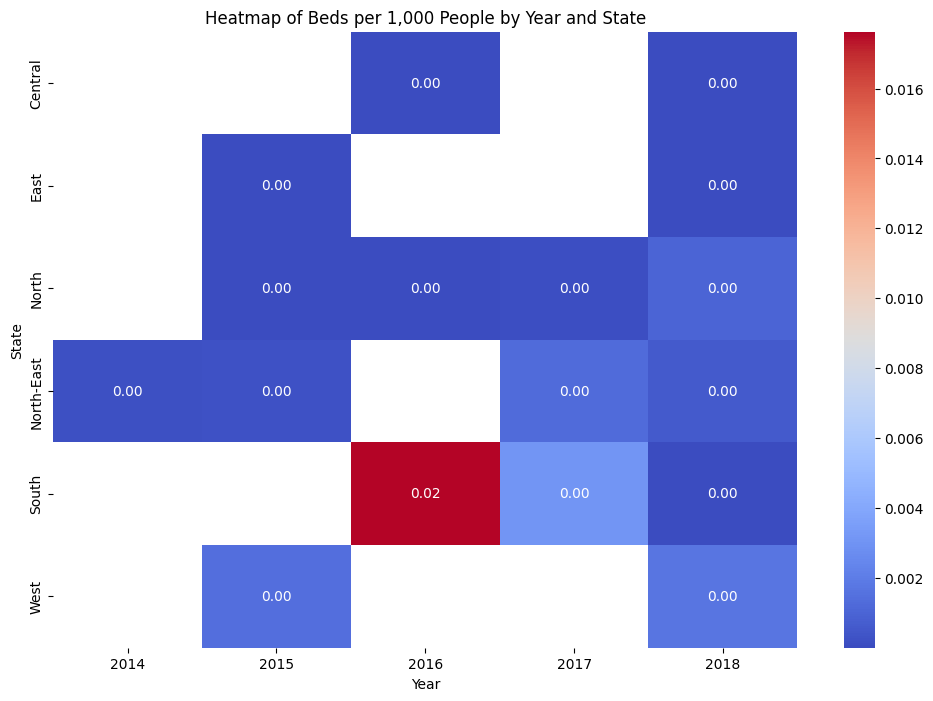

In [270]:

# Calculate beds per 1,000 people
df5['beds_per_1000'] = (df5['beds'] / df5['population']) * 1000

# Use pivot_table instead of pivot
heatmap_data = pd.pivot_table(
    df5,
    index='region',
    columns='year',
    values='beds_per_1000',
    aggfunc='mean'  # or any other appropriate aggregation function
)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Customize the plot
plt.title("Heatmap of Beds per 1,000 People by Year and State")
plt.xlabel("Year")
plt.ylabel("State")
plt.show()

**South Region was highest place**

# **Univarient**

<Axes: ylabel='count'>

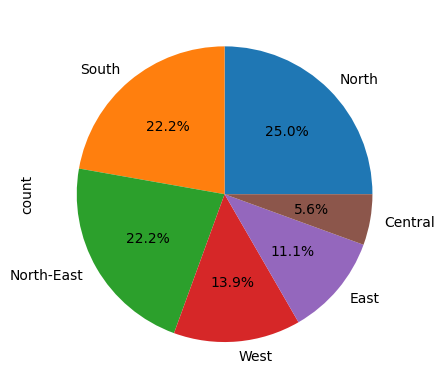

In [271]:
df5['region'].value_counts().plot.pie(autopct='%1.1f%%')

**North Region has maximum count of states - 1st**

**south and north-east region has equal number of states - 2nd**

**west have third largest count of states - 3rd**

**east have 10% count of staes in India - 4th**

**Central have minimal count of states - 5th**

# **Multivariant**

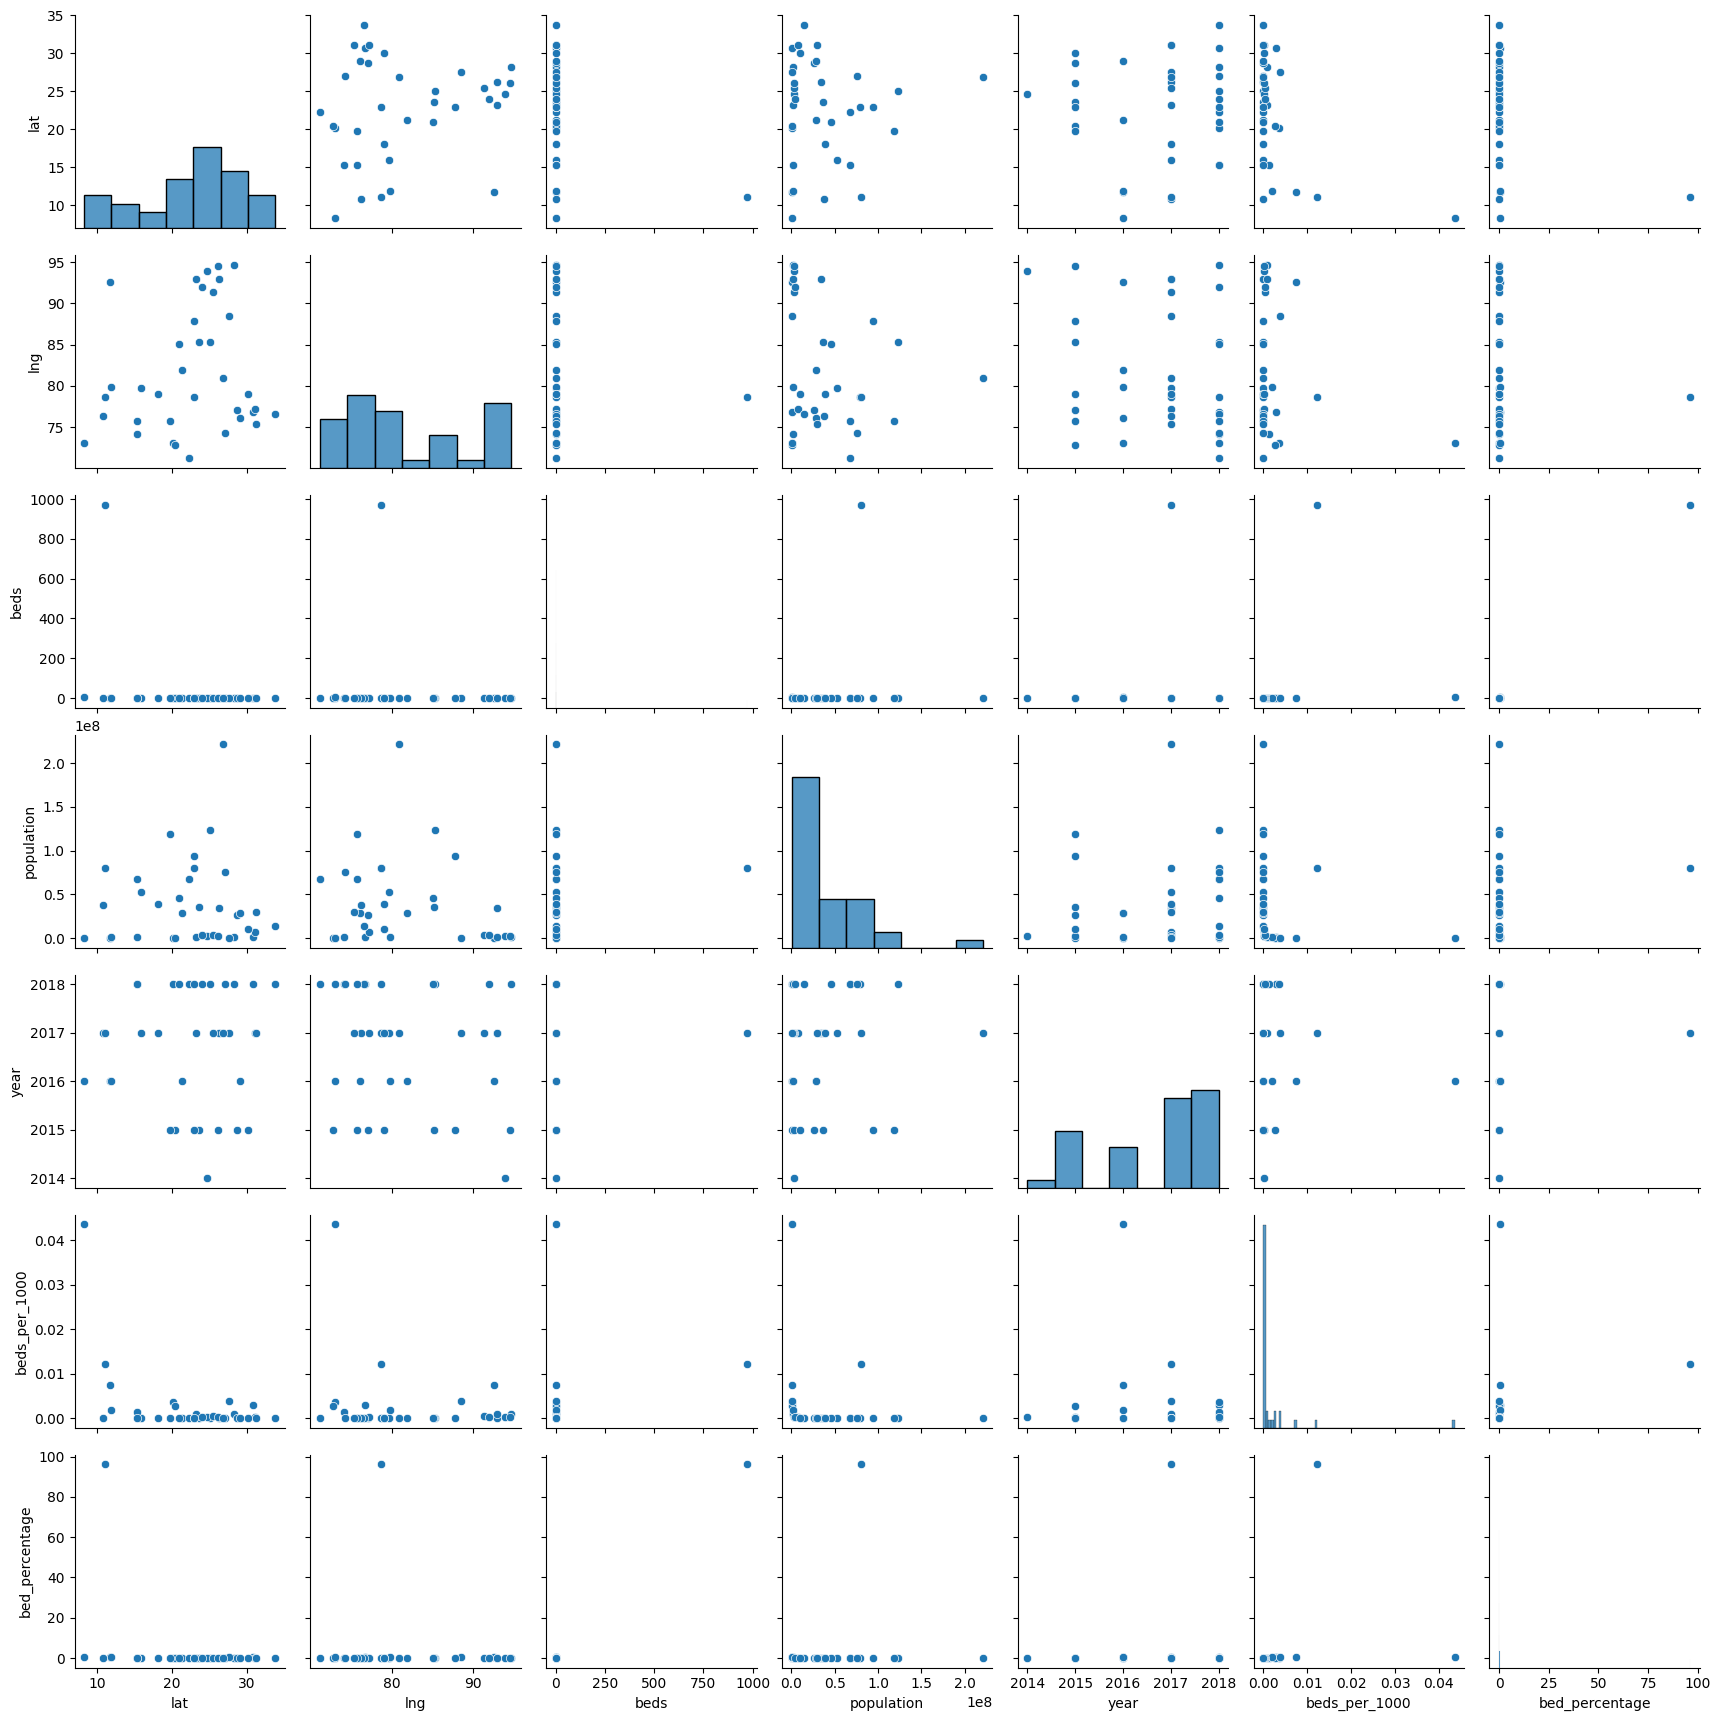

In [293]:
sns.pairplot(df5)

population,83000,294410,380520,412174,642664,1136382,1370000,1508556,1510000,1683600,...,53060000,67600000,68052000,75649600,79634400,79788000,94100000,118700000,122988691,221073168
region,,,,,,,,,,,,,,,,,,,,,
Central,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0
North,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0
North-East,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
South,100.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,...,100.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
West,0.0,100.0,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0


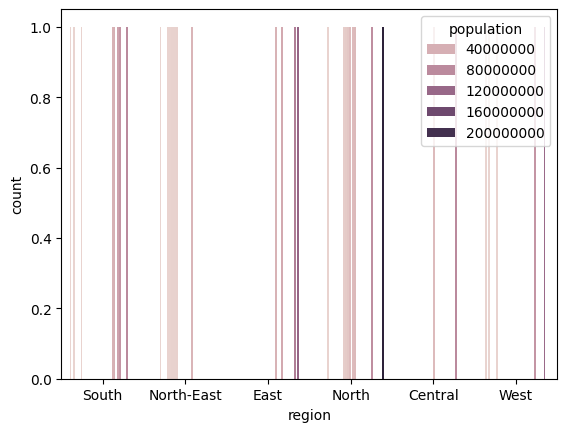

In [294]:
sns.countplot(x=df5['region'],hue=df5['population'])
pd.crosstab(df5['region'],df5['population']).apply(lambda x: x/x.sum()*100)

**North was the highest density of population**

beds,0.094838,0.296420,0.298536,0.333759,0.344954,0.390610,0.396725,0.402674,0.433412,0.436072,...,1.427893,1.501793,1.699184,1.996611,2.427396,2.605109,2.825081,3.305227,3.614458,971.725071
region,,,,,,,,,,,,,,,,,,,,,
Central,0.0,0.0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
East,100.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
North,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
North-East,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
South,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,100.0,100.0
West,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0


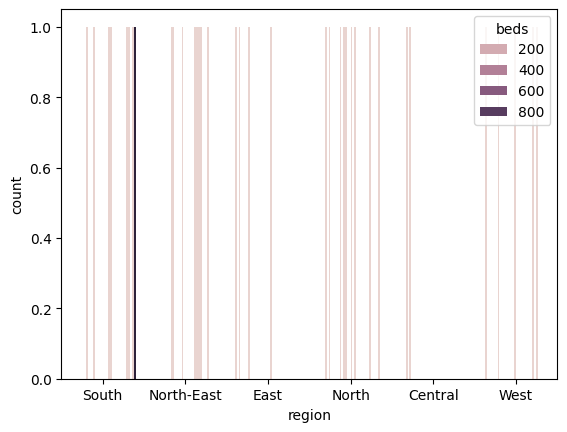

In [295]:
sns.countplot(x=df5['region'],hue=df5['beds'])
pd.crosstab(df5['region'],df5['beds']).apply(lambda x: x/x.sum()*100)

**South and North-East focus on healthcare compare to others west was very bad**

# **Feature Scalling**

In [272]:
feature = df5[['population','year']] #feature df3[['population','year','state']] before adding a state change type category to numerical only take numerical values
target = df5['beds'] #target

# **model training**

In [192]:
# check target as - > 1) data type(dtype) -
#                     2) eg: take column (population,bed) ->only numerical,
#                     3) its discret in nature so
#                     4) take dicession tree regression

#                     liberary sklearn sci kit learn

In [273]:
from sklearn.tree import DecisionTreeRegressor

In [274]:
# create seperate object for decision tree regressor

o = DecisionTreeRegressor()

In [195]:
# split train data and test data - 80% train , 20% test

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
train_test_split(feature,target)

[    population  year
 1     53060000  2017
 31    39120000  2017
 12    28332000  2016
 16    67600000  2018
 27    29924000  2017
 15    36122977  2015
 13     7297034  2017
 35    94100000  2015
 4    122988691  2018
 25    45990000  2018
 28    75649600  2018
 7       412174  2018
 21     2900000  2014
 20   118700000  2015
 6     28200000  2016
 9     26300000  2015
 5      1136382  2018
 18       83000  2016
 24     2920000  2015
 30    79788000  2017
 3     34438756  2017
 26     1370000  2016
 8       294410  2015
 19    79634400  2018
 32     3671032  2018
 10     1508556  2018
 11    68052000  2018,
     population  year
 17    37312000  2017
 22     3470000  2017
 33   221073168  2017
 2      1683600  2018
 14    14324000  2018
 34    10220000  2015
 29      642664  2017
 0       380520  2016
 23     1510000  2017,
 1       0.436072
 31      0.536375
 12      0.396725
 16      1.031376
 27      0.599285
 15      0.298536
 13      1.699184
 35      0.834920
 4       0.094838


In [277]:
feature_train,feature_test,target_train,target_test=train_test_split(feature,target)

In [278]:
feature_train

,population,year
20,118700000,2015
22,3470000,2017
33,221073168,2017
31,39120000,2017
18,83000,2016
13,7297034,2017
4,122988691,2018
3,34438756,2017
16,67600000,2018
7,412174,2018


In [279]:
feature_test

,population,year
9,26300000,2015
0,380520,2016
14,14324000,2018
28,75649600,2018
21,2900000,2014
1,53060000,2017
35,94100000,2015
17,37312000,2017
25,45990000,2018


In [280]:
target_train

,beds
20,0.433412
22,1.284438
33,0.344954
31,0.536375
18,3.614458
13,1.699184
4,0.094838
3,0.497753
16,1.031376
7,1.501793


In [281]:
target_test

,beds
9,0.927110
0,2.825081
14,0.509006
28,0.621999
21,0.492069
1,0.436072
35,0.834920
17,1.018546
25,0.402674


In [282]:
o.fit(feature_train,target_train)

DecisionTreeRegressor()

In [283]:
o.predict(feature_test)

array([2.98536000e-01, 1.50179300e+00, 8.32877000e-01, 3.90610000e-01,
       6.43836000e-01, 5.36375000e-01, 9.71725071e+02, 5.36375000e-01,
       1.03137600e+00])

In [284]:
import pandas as pd
import sqlite3

# Reconnect to the database
conn = sqlite3.connect("example.db") # Re-establish connection here

# Step 1: Run your SQL query to fetch the data
query = f"SELECT state, year, population, beds FROM {table_name};"
result = pd.read_sql_query(query, conn)

# Step 2: Ensure no division by zero (replace 0 beds with NaN or handle it)
result['beds'] = result['beds'].replace(0, None)

# Step 3: Calculate the 'population per bed' for each state
result['population_per_bed'] = result['population'] / result['beds']

# Step 4: Calculate the percentage of total beds
total_beds = result['beds'].sum()
result['bed_percentage'] = (result['beds'] / total_beds) * 100

# Display the updated result
print(result)

# Close the connection when you're completely done with it
conn.close()

   state  year  population        beds  population_per_bed  bed_percentage
0     AN  2016      380520    2.825081        1.346935e+05        0.279640
1     AP  2017    53060000    0.436072        1.216772e+08        0.043164
2     AR  2018     1683600    1.427893        1.179080e+06        0.141340
3     AS  2017    34438756    0.497753        6.918844e+07        0.049270
4     BR  2018   122988691    0.094838        1.296829e+09        0.009388
5     CH  2018     1136382    3.305227        3.438136e+05        0.327167
6     CT  2016    28200000    0.333759        8.449210e+07        0.033037
7     DN  2018      412174    1.501793        2.744546e+05        0.148655
8     DD  2015      294410    0.815190        3.611551e+05        0.080691
9     DL  2015    26300000    0.927110        2.836772e+07        0.091770
10    GA  2018     1508556    1.996611        7.555583e+05        0.197634
11    GJ  2018    68052000    0.296420        2.295797e+08        0.029341
12    HR  2016    2833200

In [285]:
import pandas as pd
import sqlite3

# Reconnect to the database
conn = sqlite3.connect("example.db") # Re-establish connection here

# Step 1: Run your SQL query to fetch the data
query = f"SELECT state, year, population, beds FROM {table_name};"
result = pd.read_sql_query(query, conn)

# Step 2: Ensure no division by zero (replace 0 beds with NaN or handle it)
result['beds'] = result['beds'].replace(0, None)

# Step 3: Calculate the 'population per bed' for each state
result['population_per_bed'] = result['population'] / result['beds']

# Step 4: Calculate the percentage of total beds
total_beds = result['beds'].sum()
result['bed_percentage'] = (result['beds'] / total_beds) * 100

# Update the SQLite table with the new 'bed_percentage' column
result.to_sql(table_name, conn, if_exists="replace", index=False)  # Update the table

query = f"SELECT state,year,population,beds,bed_percentage FROM {table_name} WHERE state='TN';"
result = pd.read_sql_query(query, conn)

# Display the results
result

# Close the connection when done
conn.close()

result

,state,year,population,beds,bed_percentage
0,TN,2017,79788000,971.725071,96.1859


In [289]:
o.predict([[80000000, 2020]]) # Assuming 'population' is the first feature and 'year' is the second

array([971.725071])

In [208]:
# take targest test data and compare with predict data

In [290]:
from sklearn.metrics import r2_score

In [291]:
predict_target = o.predict(feature_test)
predict_target

array([2.98536000e-01, 1.50179300e+00, 8.32877000e-01, 3.90610000e-01,
       6.43836000e-01, 5.36375000e-01, 9.71725071e+02, 5.36375000e-01,
       1.03137600e+00])

In [292]:
score = r2_score(predict_target,target_test)
score

-0.12473922401046811

# **prediction value is wrong because of negative value - score more than 80% is only acceptable**

# **Reason for failure of prediction is outlier values are not corrected that's the main reson for failure of prediction**

# **some of the population of state is mismatched and outlier treatment is not given**